## Demonstration of the Huygen's Principle in action

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# First, let's make a grid.

x_pts = 3000
y_pts = 2500

box_l = 12 # length of the simulation box
box_h = 10 # height of the simulation box

xs = np.linspace(0,box_l,x_pts)
ys = np.linspace(0,box_h,y_pts)

# Make a mesh

xx,yy = np.meshgrid(xs, ys, sparse=True)

zz = xx*0 + yy*0 # zz is an initial grid of zeros

In [3]:
# Define a function for returning the value at x,y for a point source placed at x_org, y_org

lmd = 1 # lmd is the wavelength

def amplitude_at_point(x,y,x_org,y_org):
    
    distance = np.sqrt((x-x_org)**2 + (y-y_org)**2)
    
    return np.sin(2*np.pi*distance/lmd)

In [4]:
# Checking if the function is valid
# Amplitude of light of wavelength 1 from a point source at 0,0 ... at a point 0.25,0
# Should be 1.0, because the wavelength is 1.0

amplitude_at_point(0.25,0,0,0)

1.0

## Simulation Parameters

In the cell below, we can adjust the simulation parameters.

`lmd` is the wavelength 

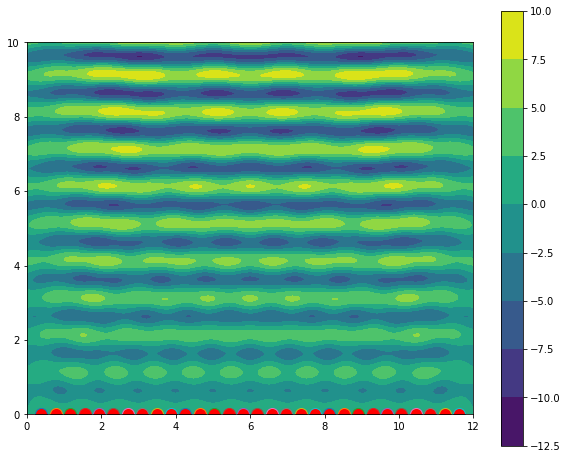

In [8]:
# Simulation parameters (What you can play with)

lmd = 1
n_points = 30

point_source_positions = np.linspace(0,box_l,n_points+2)[1:-1]

# Run the Simulation

zz = xx*0 + yy*0 # zz is an initial grid of zeros

for pos in point_source_positions:
    
    zz+= amplitude_at_point(xx,yy,pos,0)


# Generate Contour Plot

plt.figure(figsize=(10,8))

h = plt.contourf(xs, ys, zz)

for pos in point_source_positions:
    plt.plot(pos,0,marker='o',markersize=12, markerfacecolor="red")

plt.axis('scaled')
plt.colorbar()
plt.show()